In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

In [91]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt(np.abs((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k))/np.sqrt(X.shape[0])
    #print((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return k,b,sigk/k,sigb/b

In [92]:
data=pd.read_csv('20250312_before_crash.CSV')
data

,Time,Object Name,Status,Value,Units,Alert ID,Priority
0,12.03.2025 14:06:43,TIC Gauge 1,11.0,3.141000e+01,59.0,0,0
1,12.03.2025 14:06:43,TIC Turbo Speed,NaN,1.600000e+00,NaN,0,0
2,12.03.2025 14:06:43,TIC Turbo Power,NaN,8.200000e+00,NaN,0,0
3,12.03.2025 14:06:43,TIC Gauge 2,5.0,9.900000e+09,59.0,0,0
4,12.03.2025 14:06:43,TIC Gauge 3,5.0,9.900000e+09,59.0,0,0
...,...,...,...,...,...,...,...
8544,12.03.2025 15:05:30,TIC Gauge 3,5.0,9.900000e+09,59.0,0,0
8545,12.03.2025 15:05:31,TIC Turbo Speed,NaN,1.600000e+00,NaN,0,0
8546,12.03.2025 15:05:31,TIC Turbo Power,NaN,8.000000e+00,NaN,0,0
8547,12.03.2025 15:05:31,TIC Gauge 1,11.0,4.444500e+00,59.0,0,0


In [93]:
def get_otk(a,b, data):
    #data=pd.read_csv('20250312_before_crash.CSV')
    d=np.array(data[data['Object Name']=='TIC Gauge 1']['Value'])[a:b]
    t=np.array(list(map(lambda x: (datetime.strptime((x.split(' ')[1]),'%H:%M:%S')-datetime(1900, 1, 1)).total_seconds(),data[data['Object Name']=='TIC Gauge 1']['Time'])))[a:b]
    t-=t[0]
    s,e=np.where(d<10000)[0][0],np.where(d<100)[0][0]
    X,Y=t[s:e]-t[s],np.log(d[s:e]/d[s])
    plt.scatter(X,Y,marker='+')#
    c=getkb(X,Y)
    plt.plot(X,X*c[0]+c[1])
    return c

4 12


(np.float64(-0.263695565792208),
 np.float64(10.848052356259576),
 np.float64(-0.019612658655397203),
 np.float64(0.0023446769571727048))

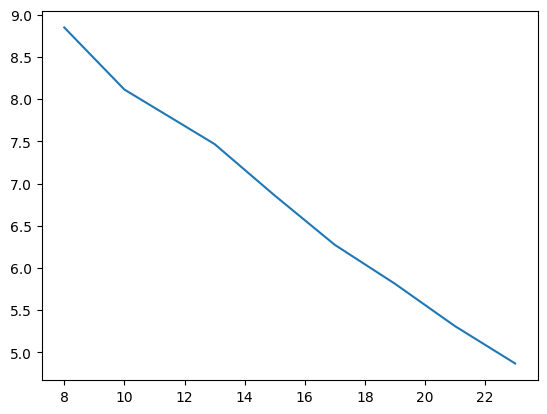

In [94]:
data=pd.read_csv('20250312_before_crash.CSV')
d=np.array(data[data['Object Name']=='TIC Gauge 1']['Value'])[860:890]
t=np.array(list(map(lambda x: (datetime.strptime((x.split(' ')[1]),'%H:%M:%S')-datetime(1900, 1, 1)).total_seconds(),data[data['Object Name']=='TIC Gauge 1']['Time'])))[860:890]
t-=t[0]
print(np.where(d<10000)[0][0],np.where(d<100)[0][0])
X,Y=t[4:12],np.log(d[4:12])
plt.plot(X,Y)#
getkb(X,Y)

2 10


(np.float64(-0.2930190531923705),
 np.float64(10.415723610417954),
 np.float64(-0.023831210995457913),
 np.float64(0.0030722897566138633))

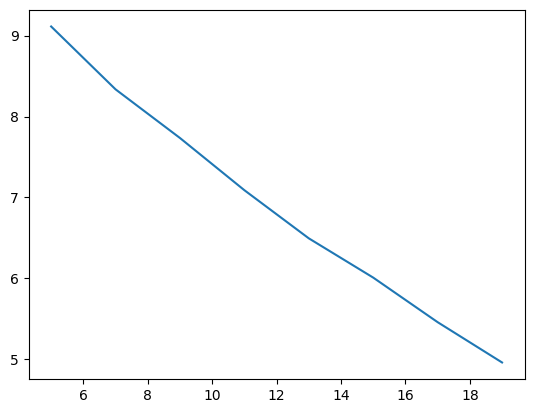

In [95]:
data=pd.read_csv('20250312_before_crash.CSV')
d=np.array(data[data['Object Name']=='TIC Gauge 1']['Value'])[1255:1270]
t=np.array(list(map(lambda x: (datetime.strptime((x.split(' ')[1]),'%H:%M:%S')-datetime(1900, 1, 1)).total_seconds(),data[data['Object Name']=='TIC Gauge 1']['Time'])))[1255:1270]
t-=t[0]
print(np.where(d<10000)[0][0],np.where(d<100)[0][0])
X,Y=t[2:10],np.log(d[2:10])
plt.plot(X,Y)#
getkb(X,Y)

4 12


(np.float64(-0.2822656339496395),
 np.float64(10.98631479821954),
 np.float64(-0.02289872840191688),
 np.float64(0.002696044027324649))

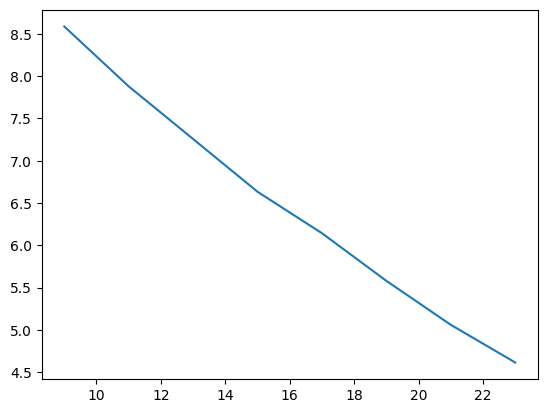

In [96]:
data=pd.read_csv('20250312_before_crash.CSV')
d=np.array(data[data['Object Name']=='TIC Gauge 1']['Value'])[1558:1580]
#plt.plot(d)
t=np.array(list(map(lambda x: (datetime.strptime((x.split(' ')[1]),'%H:%M:%S')-datetime(1900, 1, 1)).total_seconds(),data[data['Object Name']=='TIC Gauge 1']['Time'])))[1558:1580]
t-=t[0]
print(np.where(d<10000)[0][0],np.where(d<100)[0][0])
X,Y=t[4:12],np.log(d[4:12])
plt.plot(X,Y)#
getkb(X,Y)

[-0.26369557 -0.29301905 -0.28226563] [[-0.26369557 -0.11184347 -0.01961266 -0.22741763]
 [-0.29301905 -0.16246297 -0.02383121 -0.19696871]
 [-0.28226563 -0.14183939 -0.02289873 -0.20882484]] -0.27966008431140615 0.012112208579633936


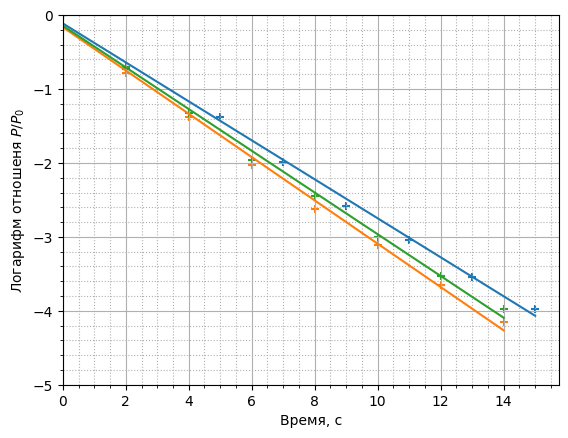

In [117]:
data=pd.read_csv('20250312_before_crash.CSV')
d=np.array(data[data['Object Name']=='TIC Gauge 1']['Value'])
#plt.plot(d[1558+4:1558+12])
sl=[(860,890),(1255,1270),(1558,1580)]
dvc=np.array([np.array(get_otk(a,b,data)) for a,b in sl])
v=dvc[:,0]
print(v,dvc,np.average(v),np.std(v))
plt.xlim(xmin=0)
plt.ylim([-5,0])
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xlabel('Время, с')
plt.ylabel('Логарифм отношеня $P/P_0$')
plt.savefig('forv.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


26985.0 22435.74074074074 16387.130434782608 13314.611111111111


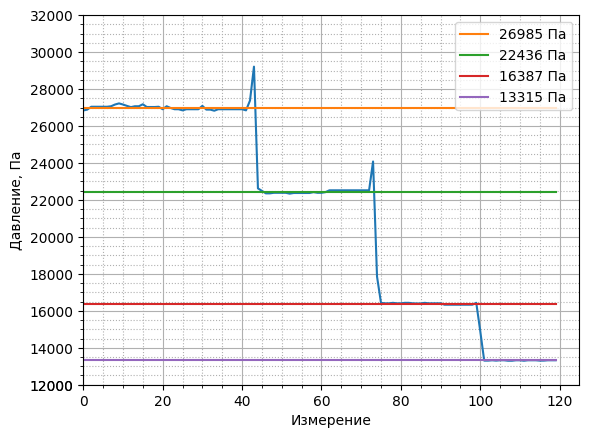

In [118]:
#[560:1000]
data=pd.read_csv('20250312_before_crash.CSV')
d=np.array(data[data['Object Name']=='TIC Gauge 1']['Value'])[1400:1600-80]
plt.plot(d)
#plt.plot([102]*2,[np.min(d),np.max(d)])
plt.plot([np.average(d[:41])]*d.shape[0],label='26985 Па')
plt.plot([np.average(d[45:72])]*d.shape[0],label='22436 Па')
plt.plot([np.average(d[75:98])]*d.shape[0],label='16387 Па')
plt.plot([np.average(d[102:120])]*d.shape[0],label='13315 Па')
print(np.average(d[:41]),np.average(d[45:72]),np.average(d[75:98]),np.average(d[102:120]))
plt.xlabel('Измерение')
plt.ylabel('Давление, Па')
plt.legend()
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xlim(xmin=0)
plt.ylim(ymin=12500)
plt.yticks(list(plt.yticks()[0]) + [12000])
plt.savefig('low.eps')

28294.91304347826 22931.6 16477.285714285714 13456.941176470587


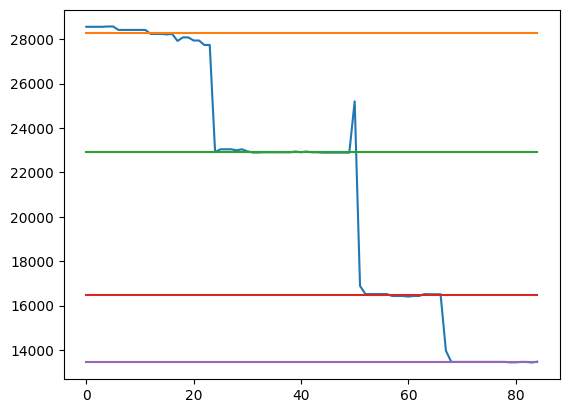

In [61]:
data1=pd.read_csv('20250312.CSV')
d=np.array(data1[data1['Object Name']=='TIC Gauge 1']['Value'])[45:130]
plt.plot(d)

plt.plot([np.average(d[:23])]*d.shape[0])
plt.plot([np.average(d[24:49])]*d.shape[0])
plt.plot([np.average(d[52:66])]*d.shape[0])
plt.plot([np.average(d[68:130])]*d.shape[0])
print(np.average(d[:23]),np.average(d[24:49]),np.average(d[52:66]),np.average(d[68:130]))

26757.12162162162
26985 22436 16387 13315
26757 22932 16477 13457

In [62]:
Ps=np.array([(26985+26757)/2,(22436+22932)/2,(16387+16477)/2,(13315+13457)/2])
ePs=np.array([np.std([26985,26757]),np.std([22436,22932]),np.std([16387,16477]),np.std([13315,13457])])/Ps
Ps,ePs

(array([26871., 22684., 16432., 13386.]),
 array([0.00424249, 0.01093282, 0.00273856, 0.00530405]))

In [63]:
Vs=np.append(np.array(252),252*1e5/Ps)
Vs

array([ 252.        ,  937.81400022, 1110.91518251, 1533.59298929,
       1882.5638727 ])

In [64]:
Vs[1:]-Vs[:-1]

array([685.81400022, 173.10118228, 422.67780678, 348.97088341])

In [99]:
1.6*0.28

0.44800000000000006

9900000000.0


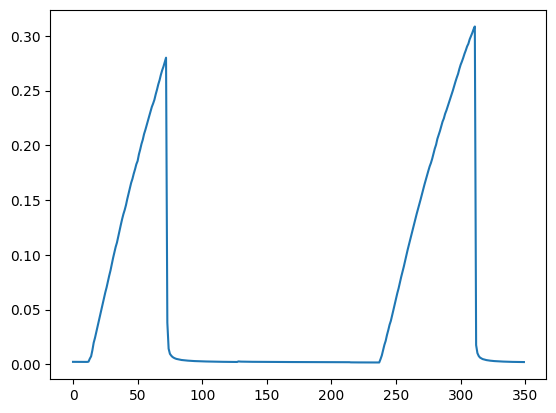

In [65]:
data1=pd.read_csv('20250312.CSV')
print(np.array(data1[data1['Object Name']=='TIC Gauge 3']['Value'])[0])
#plt.plot(np.array(data[(data['Object Name']=='TIC Gauge 1') & (data['Value']!=9900000000.0)]['Value']))
#plt.plot(np.array(data1[(data1['Object Name']=='TIC Gauge 3') & (data1['Value']!=9900000000.0)]['Value'])[500:620])
plt.plot(np.array(data1[(data1['Object Name']=='TIC Gauge 2') & (data1['Value']!=9900000000.0)]['Value'])[520:870])

In [66]:
np.array(data[(data['Object Name']=='TIC Gauge 2') & (data['Value']!=9900000000.0)]['Value'])

array([], dtype=float64)

-0.019768771465448098 -5.297644777234302 0.0009762908112170428 0.008436116791647887
-0.026545087747573165 -5.4388821522171655 0.0011932173065779242 0.005468008627924666
-0.030652586525145686 -5.739803512235414 3.974453868398469e-08 3.974453868398469e-08

5 19
-0.02453299518467506 -5.631253416697136 0.0012269808129906615 0.005622732451788162


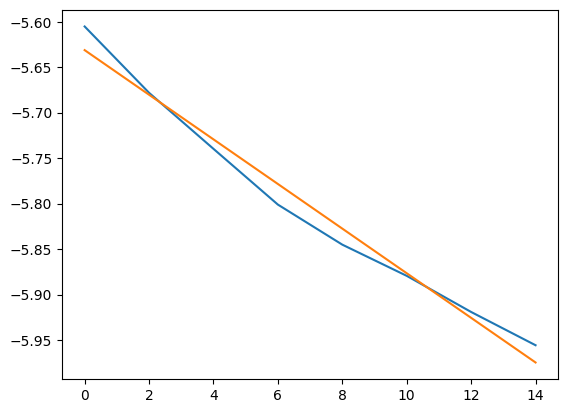

In [16]:
d1=np.array(data1[(data1['Object Name']=='TIC Gauge 2') & (data1['Value']!=9900000000.0)]['Value'])[1055:1090]
s,e=np.where(d1<0.1)[0][0],np.where(d1<0.0025)[0][0]
print(s,e)
d4=np.log(d1[s+6:e])
x=np.arange(0,d4.shape[0])*2
plt.plot(x,d4)
k,b,sk,sb=getkb(x,d4)
print(k,b,sk,sb)
plt.plot(x,x*k+b)

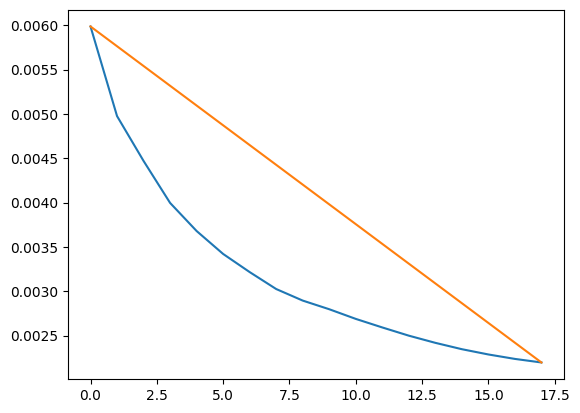

In [17]:
d2=(np.array(data1[(data1['Object Name']=='TIC Gauge 2') & (data1['Value']!=9900000000.0)]['Value'])[1059:1080])[3:]
plt.plot(d2)
plt.plot([0,d2.shape[0]-1],[d2[0],d2[d2.shape[0]-1]])

In [18]:
data1['Time']=np.array(list(map(lambda x: (datetime.strptime((x.split(' ')[1]),'%H:%M:%S')-datetime(1900, 1, 1)).total_seconds(),\
                            data1['Time'])))

In [19]:
d3=data1[(data1['Object Name']=='TIC Gauge 2') & (data1['Value']!=9900000000.0)]
d3

,Time,Object Name,Status,Value,Units,Alert ID,Priority
2518,55694.0,TIC Gauge 2,11.0,0.325570,59.0,0,0
2523,55696.0,TIC Gauge 2,11.0,0.303070,59.0,0,0
2528,55698.0,TIC Gauge 2,11.0,0.283930,59.0,0,0
2533,55700.0,TIC Gauge 2,11.0,0.272170,59.0,0,0
2538,55702.0,TIC Gauge 2,11.0,0.263080,59.0,0,0
...,...,...,...,...,...,...,...
8588,58194.0,TIC Gauge 2,11.0,0.006758,59.0,0,0
8593,58196.0,TIC Gauge 2,11.0,0.010743,59.0,0,0
8598,58198.0,TIC Gauge 2,11.0,0.014183,59.0,0,0
8603,58200.0,TIC Gauge 2,11.0,0.018098,59.0,0,0


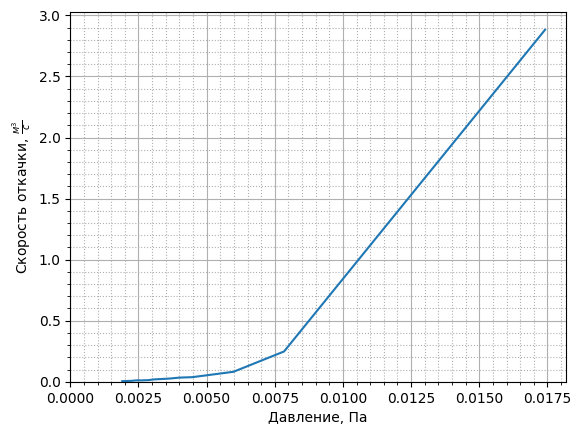

In [186]:
e=1090
s=0
plt.plot(np.array(d3['Value'])[1060:e],-0.68*np.array(np.gradient(d3['Value'],d3['Time'])/d3['Value'])[1060:e])
plt.xlabel('Давление, Па')
plt.ylabel(r'Скорость откачки, $\frac{м^3}{с}$')
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
#plt.yticks(list(plt.yticks()[0]) + [12000])
plt.savefig('trb.eps')

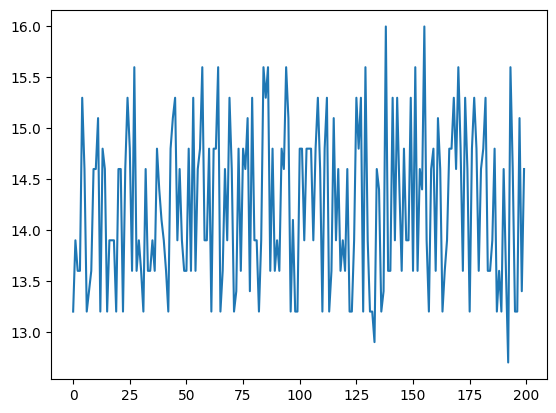

In [21]:
plt.plot(np.array(data1[data1['Object Name']=='TIC Turbo Power']['Value'])[650+400:750+500])

Text(0, 0.5, 'Давление, Па')

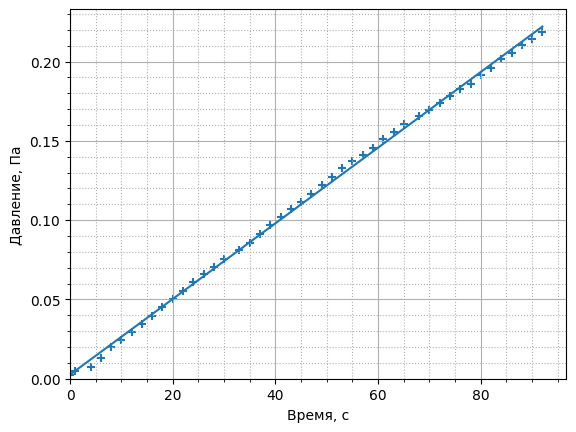

In [122]:
s=457+75
dl=61-15
x=np.array(d3['Time'])[s:s+dl]-np.array(d3['Time'])[s]
y=np.array(d3['Value'])[s:s+dl]
a1,b,sa1,sb=getkb(x,y)
plt.scatter(x,y,marker='+')
plt.plot(x,x*a1+b)
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xlabel('Время, с')
plt.ylabel('Давление, Па')

Text(0, 0.5, 'Давление, Па')

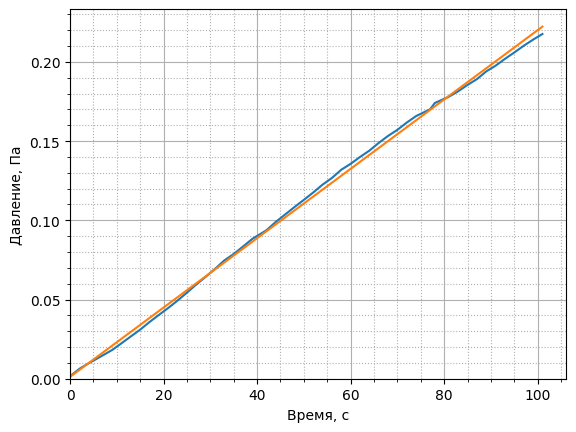

In [120]:
s=957+28
dl=75-25
x=np.array(d3['Time'])[s:s+dl]-np.array(d3['Time'])[s]
y=np.array(d3['Value'])[s:s+dl]
a2,b,sa2,sb=getkb(x,y)
plt.plot(x,y)
plt.plot(x,x*a2+b)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel('Время, с')
plt.ylabel('Давление, Па')

Text(0, 0.5, 'Давление, Па')

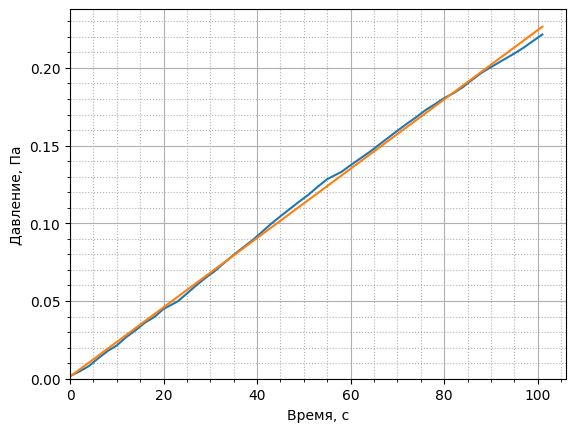

In [121]:
s=757
dl=75-25
x=np.array(d3['Time'])[s:s+dl]-np.array(d3['Time'])[s]
y=np.array(d3['Value'])[s:s+dl]
a3,b,sa3,sb=getkb(x,y)
plt.plot(x,y)
plt.plot(x,x*a3+b)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.xlabel('Время, с')
plt.ylabel('Давление, Па')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


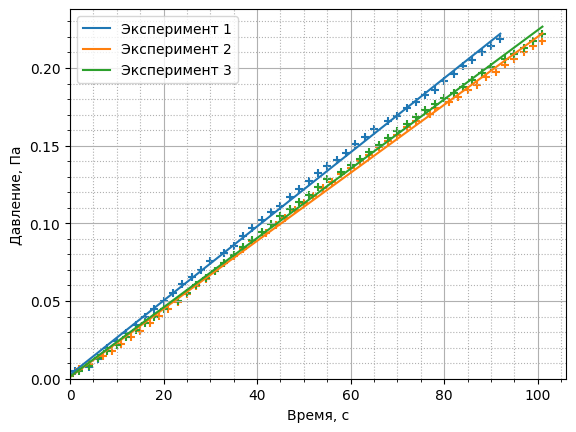

In [130]:
s=457+75
dl=61-15
x=np.array(d3['Time'])[s:s+dl]-np.array(d3['Time'])[s]
y=np.array(d3['Value'])[s:s+dl]
a1,b,sa1,sb=getkb(x,y)
plt.scatter(x,y,marker='+')
plt.plot(x,x*a1+b,label='Эксперимент 1')

s=957+28
dl=75-25
x=np.array(d3['Time'])[s:s+dl]-np.array(d3['Time'])[s]
y=np.array(d3['Value'])[s:s+dl]
a2,b,sa2,sb=getkb(x,y)
plt.scatter(x,y,marker='+')
plt.plot(x,x*a2+b,label='Эксперимент 2')

s=757
dl=75-25
x=np.array(d3['Time'])[s:s+dl]-np.array(d3['Time'])[s]
y=np.array(d3['Value'])[s:s+dl]
a3,b,sa3,sb=getkb(x,y)
plt.scatter(x,y,marker='+')
plt.plot(x,x*a3+b,label='Эксперимент 3')

plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.xlabel('Время, с')
plt.ylabel('Давление, Па')
plt.legend()
plt.savefig('natek.eps')

In [124]:
(a1,a2,a3),(sa1,sa2,sa3)

((np.float64(0.002385713475158461),
  np.float64(0.0021894975831798576),
  np.float64(0.002230169713751399)),
 (np.float64(0.004858363609285034),
  np.float64(0.00524995265094504),
  np.float64(0.004976493564638376)))

In [129]:
np.average([a1,a2,a3]), np.std([sa1,sa2,sa3])/np.average([a1,a2,a3])/3

(np.float64(0.002268460257363239), np.float64(0.024099202083859596))

In [131]:
0.68*0.23

0.1564

In [105]:
def getlamb(P):
    #p=nkT lamb=1/(sigm*n) lamb=kT/(sigm*p)
    T=273+22
    k=1.38e-23
    sigm=np.pi*(3e-10)**2
    
    return k*T/(sigm*P)

In [132]:
getlamb(0.2),getlamb(1e5)/0.05

(0.071991085925234, 2.8796434370093604e-06)

In [188]:
np.min(np.array(d3['Value'])[300:]), getlamb(0.0012)/0.05

(np.float64(0.0012098), 239.9702864174467)

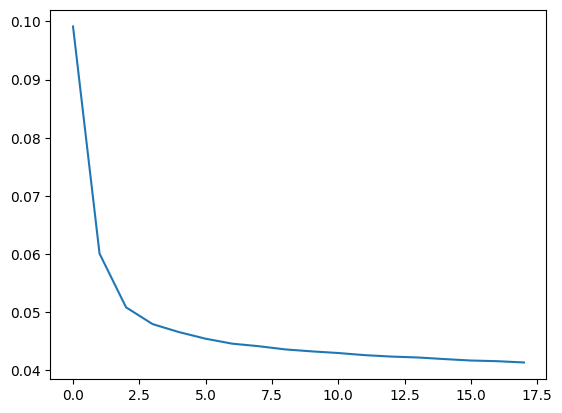

In [181]:
plt.plot((np.array(d3['Value']))[380:398])

In [178]:
np.min(getlamb(np.array(d3['Value'])[500:]))

np.float64(0.04667017984845483)

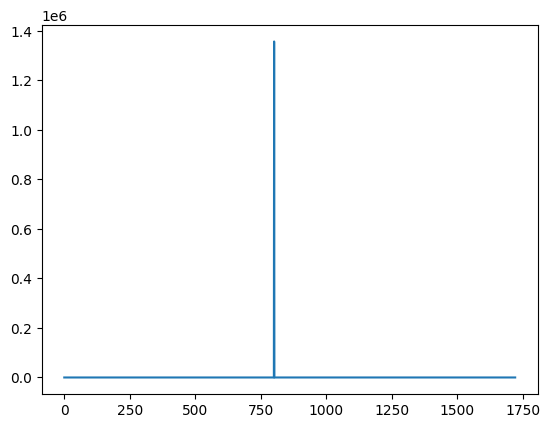

In [30]:
plt.plot(getlamb(np.array(data1[data1['Object Name']=='TIC Gauge 2']['Value']))/0.05)

In [31]:
dm=np.array(data1[data1['Object Name']=='TIC Gauge 2']['Value'])
np.where(dm==np.min(dm))

(array([801]),)

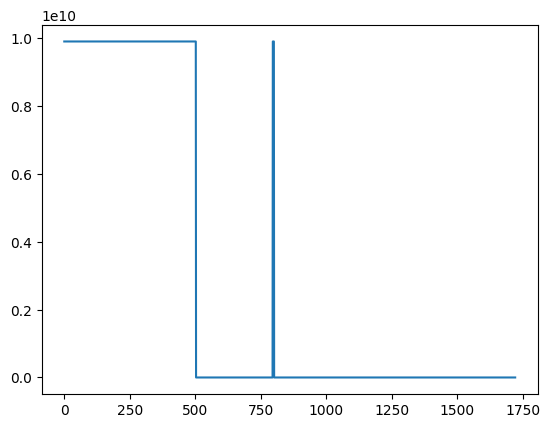

In [167]:
plt.plot(np.array(data1[data1['Object Name']=='TIC Gauge 2']['Value']))